# Final Project

- [Proposal](https://docs.google.com/document/d/1unp9emEueY_tyzT37XDVOiNJ4MBI39SgqNB95Cb8c3c/edit?usp=sharing)
- [Proposal Slides](https://docs.google.com/presentation/d/19HS_KwSPFKRd2zuvY_Q2bnih39fn7u_j0c6uu4J9InA/edit?usp=sharing)
- [Report]()
- [Final Presentation Slides]()
- [Dataset](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=results.csv)
- [API](https://docs.fastf1.dev/core.html#api-reference)

## Setup

In [565]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import fastf1
from scipy.stats import pearsonr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Exploring/Cleaning Data

In [ ]:
# session = fastf1.get_session(2022, 'Australia', 'race')
# session.load()
# display(session.name)
# display(session.date)
# display(session.session_info)
# display(session.drivers)
# display(session.results)
# display(session.laps)
# display(session.total_laps)
# display(session.weather_data)
# display(session.car_data)
# display(session.pos_data)
# display(session.session_start_time)
# display(session.t0_date)

In [ ]:
# races = pd.read_csv('races.csv')
# italianRaceID = races[races.name == 'Italian Grand Prix'][races.year == 2023].raceId.tolist()[0]
# italianRaceID
# results = pd.read_csv('results.csv')
# italianRace = results[results.raceId == italianRaceID]
# italianRace

### Fetching data on the 2023 Italian Grand Prix race

In [ ]:
session = fastf1.get_session(2023, 'Monza', 'race')
session.load()
lapsOriginal = session.laps

In [556]:
qualifyingSession = fastf1.get_session(2023, 'Monza', 'Q')
qualifyingSession.load()
qualifyingResults = qualifyingSession.results

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['55', '1', '16', '63', '11', '23', '81', '44', '4', '14', '22', '40', '27', '77', '2', '24', '10', '31', '20', '18']


In [558]:
qualifyingResults.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'DriverId', 'TeamName',
       'TeamColor', 'TeamId', 'FirstName', 'LastName', 'FullName',
       'HeadshotUrl', 'CountryCode', 'Position', 'ClassifiedPosition',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points'],
      dtype='object')

In [497]:
results = session.results
topTime = results[results.Position == 1].Time.tolist()[0]
results['TotalTime'] = topTime + results['Time']
results.loc[results.Position == 1, 'TotalTime'] = results.Time
results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points,TotalTime
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,1.0,1,2.0,NaT,NaT,NaT,0 days 01:13:41.143000,Finished,25.0,0 days 01:13:41.143000
11,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,2.0,2,5.0,NaT,NaT,NaT,0 days 00:00:06.064000,Finished,18.0,0 days 01:13:47.207000
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,3.0,3,1.0,NaT,NaT,NaT,0 days 00:00:11.193000,Finished,15.0,0 days 01:13:52.336000
16,16,C LECLERC,LEC,leclerc,Ferrari,F91536,ferrari,Charles,Leclerc,Charles Leclerc,...,4.0,4,3.0,NaT,NaT,NaT,0 days 00:00:11.377000,Finished,12.0,0 days 01:13:52.520000
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,5.0,5,4.0,NaT,NaT,NaT,0 days 00:00:23.028000,Finished,10.0,0 days 01:14:04.171000
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,6.0,6,8.0,NaT,NaT,NaT,0 days 00:00:42.679000,Finished,8.0,0 days 01:14:23.822000
23,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,7.0,7,6.0,NaT,NaT,NaT,0 days 00:00:45.106000,Finished,6.0,0 days 01:14:26.249000
4,4,L NORRIS,NOR,norris,McLaren,F58020,mclaren,Lando,Norris,Lando Norris,...,8.0,8,9.0,NaT,NaT,NaT,0 days 00:00:45.449000,Finished,4.0,0 days 01:14:26.592000
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,9.0,9,10.0,NaT,NaT,NaT,0 days 00:00:46.294000,Finished,2.0,0 days 01:14:27.437000
77,77,V BOTTAS,BOT,bottas,Alfa Romeo,C92D4B,alfa,Valtteri,Bottas,Valtteri Bottas,...,10.0,10,14.0,NaT,NaT,NaT,0 days 00:01:04.056000,Finished,1.0,0 days 01:14:45.199000


In [498]:
results[['Abbreviation', 'Position', 'ClassifiedPosition', 'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'TotalTime', 'Status']]

,Abbreviation,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,TotalTime,Status
1,VER,1.0,1,2.0,NaT,NaT,NaT,0 days 01:13:41.143000,0 days 01:13:41.143000,Finished
11,PER,2.0,2,5.0,NaT,NaT,NaT,0 days 00:00:06.064000,0 days 01:13:47.207000,Finished
55,SAI,3.0,3,1.0,NaT,NaT,NaT,0 days 00:00:11.193000,0 days 01:13:52.336000,Finished
16,LEC,4.0,4,3.0,NaT,NaT,NaT,0 days 00:00:11.377000,0 days 01:13:52.520000,Finished
63,RUS,5.0,5,4.0,NaT,NaT,NaT,0 days 00:00:23.028000,0 days 01:14:04.171000,Finished
44,HAM,6.0,6,8.0,NaT,NaT,NaT,0 days 00:00:42.679000,0 days 01:14:23.822000,Finished
23,ALB,7.0,7,6.0,NaT,NaT,NaT,0 days 00:00:45.106000,0 days 01:14:26.249000,Finished
4,NOR,8.0,8,9.0,NaT,NaT,NaT,0 days 00:00:45.449000,0 days 01:14:26.592000,Finished
14,ALO,9.0,9,10.0,NaT,NaT,NaT,0 days 00:00:46.294000,0 days 01:14:27.437000,Finished
77,BOT,10.0,10,14.0,NaT,NaT,NaT,0 days 00:01:04.056000,0 days 01:14:45.199000,Finished


### Cleaning, combining, and adding to the data

In [559]:
laps = lapsOriginal.copy()

# Extract seconds from lap times
laps['LapSeconds'] = (laps['LapTime'].dt.seconds * 1000000 + laps['LapTime'].dt.microseconds) / 1000000
# Get an accumulated time for each lap
lapStartTime = laps.iloc[0].LapStartDate
laps['LapStartTimeSeconds'] = laps.LapStartDate - lapStartTime
# Add driver-specific data
laps = pd.merge(laps, results[['Abbreviation', 'Position', 'GridPosition', 'TotalTime']], left_on='Driver', right_on='Abbreviation', how='left')
# Add qualifying data
laps = pd.merge(laps, qualifyingResults[['Abbreviation', 'Q1', 'Q2', 'Q3']], left_on='Driver', right_on='Abbreviation', how='left')
# Bin drivers into upper half of finishers and lower half
laps['UpperHalf'] = laps['Position_y'].apply(lambda x: True if x <= laps['Position_y'].max() / 2 else False)
# Calculate the number of pit stops for each driver
driverPitStops = laps.groupby('Driver')['PitInTime'].nunique().reset_index()
driverPitStops.columns = ['Driver', 'PitStops']
laps = pd.merge(laps, driverPitStops, on='Driver', how='left')
# Calculate mean and std of lap times for each driver
meanLapTimes = laps.groupby('Driver')['LapTime'].mean().reset_index()
meanLapTimes.columns = ['Driver', 'MeanLapTime']
stdLapTimes = laps.groupby('Driver')['LapTime'].std().reset_index()
stdLapTimes.columns = ['Driver', 'stdLapTime']
lapTimesStats = pd.merge(meanLapTimes, stdLapTimes, on='Driver', how='left')
laps = pd.merge(laps, lapTimesStats, on='Driver', how='left')

# Calculate pit stop durations/timing
for i in range(laps.PitStops.max()):
    laps[f'Stop{i+1}Time'] = pd.NaT
    laps[f'Stop{i+1}Lap'] = np.NaN
laps['avgStopTime'] = pd.NaT
laps['LongestStopTime'] = pd.NaT
laps

for driver in laps.Driver.unique():
    driverStats = laps[laps.Driver == driver].reset_index()
    pitIn = driverStats[driverStats.PitInTime.notna()].index
    pitOut = driverStats[driverStats.PitOutTime.notna()].index
    pitTimes = []
    for i in range(len(pitOut)):
        pitTime = driverStats.iloc[pitOut[i]].PitOutTime - driverStats.iloc[pitIn[i]].PitInTime
        pitTimes.append(pitTime)
        laps.loc[laps['Driver'] == driver, f'Stop{i+1}Time'] = pitTime
        laps.loc[laps['Driver'] == driver, f'Stop{i+1}Lap'] = driverStats.iloc[pitIn[i]].LapNumber
    if len(pitTimes) > 0:
        avgPitTime = pd.Timedelta(0)
        longestPitTime = pd.Timedelta(0)
        for time in pitTimes:
            avgPitTime += time
            if time > longestPitTime: 
                longestPitTime = time
        avgPitTime /= len(pitTimes)
        
        laps.loc[laps['Driver'] == driver, 'avgStopTime'] = avgPitTime
        laps.loc[laps['Driver'] == driver, 'LongestStopTime'] = longestPitTime

display(laps)
display(laps.columns)
laps.describe()

C:\Users\nated\AppData\Local\Temp\ipykernel_34184\3760470420.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:24.281000' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  laps.loc[laps['Driver'] == driver, f'Stop{i+1}Time'] = pitTime
C:\Users\nated\AppData\Local\Temp\ipykernel_34184\3760470420.py:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:24.281000' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  laps.loc[laps['Driver'] == driver, 'avgStopTime'] = avgPitTime
C:\Users\nated\AppData\Local\Temp\ipykernel_34184\3760470420.py:54: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0 days 00:00:24.281000' has dtype incompatible with datetime64[ns], plea

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,UpperHalf,PitStops,MeanLapTime,stdLapTime,Stop1Time,Stop1Lap,Stop2Time,Stop2Lap,avgStopTime,LongestStopTime
0,0 days 01:23:49.801000,VER,1,0 days 00:01:27.905000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.666000,...,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,20.0,NaN,NaN,0 days 00:00:24.281000,0 days 00:00:24.281000
1,0 days 01:25:15.964000,VER,1,0 days 00:01:26.163000,2.0,1.0,NaT,NaT,0 days 00:00:28.274000,0 days 00:00:29.543000,...,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,20.0,NaN,NaN,0 days 00:00:24.281000,0 days 00:00:24.281000
2,0 days 01:26:41.666000,VER,1,0 days 00:01:25.702000,3.0,1.0,NaT,NaT,0 days 00:00:28.097000,0 days 00:00:29.320000,...,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,20.0,NaN,NaN,0 days 00:00:24.281000,0 days 00:00:24.281000
3,0 days 01:28:07.716000,VER,1,0 days 00:01:26.050000,4.0,1.0,NaT,NaT,0 days 00:00:28.145000,0 days 00:00:29.474000,...,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,20.0,NaN,NaN,0 days 00:00:24.281000,0 days 00:00:24.281000
4,0 days 01:29:33.892000,VER,1,0 days 00:01:26.176000,5.0,1.0,NaT,NaT,0 days 00:00:28.155000,0 days 00:00:29.514000,...,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,20.0,NaN,NaN,0 days 00:00:24.281000,0 days 00:00:24.281000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,0 days 02:31:27.453000,PIA,81,0 days 00:01:26.614000,47.0,3.0,NaT,NaT,0 days 00:00:28.276000,0 days 00:00:29.795000,...,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,23.0,0 days 00:00:31.797000,41.0,0 days 00:00:27.968500,0 days 00:00:31.797000
963,0 days 02:32:53.520000,PIA,81,0 days 00:01:26.067000,48.0,3.0,NaT,NaT,0 days 00:00:28.089000,0 days 00:00:29.668000,...,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,23.0,0 days 00:00:31.797000,41.0,0 days 00:00:27.968500,0 days 00:00:31.797000
964,0 days 02:34:19.361000,PIA,81,0 days 00:01:25.841000,49.0,3.0,NaT,NaT,0 days 00:00:27.763000,0 days 00:00:29.762000,...,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,23.0,0 days 00:00:31.797000,41.0,0 days 00:00:27.968500,0 days 00:00:31.797000
965,0 days 02:35:44.954000,PIA,81,0 days 00:01:25.593000,50.0,3.0,NaT,NaT,0 days 00:00:28.181000,0 days 00:00:29.335000,...,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,23.0,0 days 00:00:31.797000,41.0,0 days 00:00:27.968500,0 days 00:00:31.797000


Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position_x', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'LapSeconds', 'LapStartTimeSeconds',
       'Abbreviation_x', 'Position_y', 'GridPosition', 'TotalTime',
       'Abbreviation_y', 'Q1', 'Q2', 'Q3', 'UpperHalf', 'PitStops',
       'MeanLapTime', 'stdLapTime', 'Stop1Time', 'Stop1Lap', 'Stop2Time',
       'Stop2Lap', 'avgStopTime', 'LongestStopTime'],
      dtype='object')

,Time,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,GridPosition,TotalTime,Q1,Q2,Q3,PitStops,MeanLapTime,stdLapTime,Stop1Lap,Stop2Lap
count,967,948,967.000000,967.000000,25,26,929,948,948,928,...,967.000000,825,967,724,519,967.000000,966,966,966.000000,306.000000
mean,0 days 02:00:29.264126163,0 days 00:01:27.766147679,25.974147,1.736298,0 days 01:55:36.463640,0 days 01:56:09.235000,0 days 00:00:28.839644779,0 days 00:00:30.047214135,0 days 00:00:28.819651898,0 days 01:59:34.552404094,...,10.332989,0 days 01:14:28.865903030,0 days 00:01:22.136373319,0 days 00:01:21.443332872,0 days 00:01:20.708052023,1.355739,0 days 00:01:27.765179963,0 days 00:00:03.497451298,18.370600,35.000000
min,0 days 01:23:49.013000,0 days 00:01:25.072000,1.000000,1.000000,0 days 01:37:34.372000,0 days 01:37:06.997000,0 days 00:00:27.731000,0 days 00:00:29.130000,0 days 00:00:27.838000,0 days 01:24:17.279000,...,1.000000,0 days 01:13:41.143000,0 days 00:01:21.573000,0 days 00:01:20.937000,0 days 00:01:20.294000,0.000000,0 days 00:01:26.689078431,0 days 00:00:02.770904323,10.000000,31.000000
25%,0 days 01:41:29.115500,0 days 00:01:26.463250,13.000000,1.000000,0 days 01:44:37.492000,0 days 01:45:37.737750,0 days 00:00:28.148000,0 days 00:00:29.761500,0 days 00:00:28.421000,0 days 01:41:43.683000,...,5.000000,0 days 01:13:52.520000,0 days 00:01:21.930000,0 days 00:01:21.240000,0 days 00:01:20.361000,1.000000,0 days 00:01:27.042568627,0 days 00:00:02.870592843,14.000000,33.000000
50%,0 days 02:00:35.264000,0 days 00:01:27.044000,26.000000,2.000000,0 days 01:53:09.955000,0 days 01:52:54.541500,0 days 00:00:28.261000,0 days 00:00:30.005500,0 days 00:00:28.677500,0 days 01:59:40.655500,...,10.000000,0 days 01:14:26.592000,0 days 00:01:22.106000,0 days 00:01:21.382000,0 days 00:01:20.688000,1.000000,0 days 00:01:27.962500,0 days 00:00:03.069690434,20.000000,33.000000
75%,0 days 02:18:53.835000,0 days 00:01:27.518750,39.000000,2.000000,0 days 02:02:09.621000,0 days 02:06:32.563500,0 days 00:00:28.412000,0 days 00:00:30.226500,0 days 00:00:28.925250,0 days 02:17:22.906250,...,16.000000,0 days 01:14:54.217000,0 days 00:01:22.390000,0 days 00:01:21.758000,0 days 00:01:20.820000,2.000000,0 days 00:01:28.296720,0 days 00:00:04.292825736,22.000000,39.000000
max,0 days 02:40:15.309000,0 days 00:01:53.593000,52.000000,3.000000,0 days 02:22:52.576000,0 days 02:22:20.779000,0 days 00:00:56.224000,0 days 00:00:32.732000,0 days 00:00:47.837000,0 days 02:35:49.737000,...,20.000000,0 days 01:15:08.409000,0 days 00:01:22.860000,0 days 00:01:21.944000,0 days 00:01:21.417000,2.000000,0 days 00:01:29.101974358,0 days 00:00:04.857096181,27.000000,41.000000
std,0 days 00:21:43.269455167,0 days 00:00:03.598416700,14.812575,0.626994,0 days 00:12:43.457600916,0 days 00:13:23.479666184,0 days 00:00:03.371164983,0 days 00:00:00.452883617,0 days 00:00:01.050402745,0 days 00:20:47.343383159,...,5.890721,0 days 00:00:29.090368624,0 days 00:00:00.325593762,0 days 00:00:00.327145804,0 days 00:00:00.324903067,0.481141,0 days 00:00:00.662292322,0 days 00:00:00.718891193,4.852575,3.657465


In [ ]:
laps[laps.LapTime == laps.LapTime.min()]

### Visualizing the data

#### Average lap times

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(laps.sort_values(by='Position_y'), x='Driver', y='LapTime')
plt.gca().invert_yaxis()  # Invert the y-axis

In [ ]:
temp = laps.groupby('Driver').agg({'MeanLapTime': 'max', 'stdLapTime': 'max', 'Position_y': 'max'}).reset_index()
cleanTemp = temp.dropna(subset=['MeanLapTime', 'stdLapTime'])
# cleanTemp = cleanTemp[cleanTemp.Driver != 'OCO']

corr, p_value = pearsonr(cleanTemp['MeanLapTime'].dt.seconds, cleanTemp['Position_y'])
display(corr)
display(p_value)

corr, p_value = pearsonr(cleanTemp['stdLapTime'].dt.seconds, cleanTemp['Position_y'])
display(corr)
display(p_value)

#### Lap times over time

In [ ]:
cleanLaps = laps.dropna(subset='LapSeconds')
corr, p_value = pearsonr(cleanLaps['LapNumber'], cleanLaps['LapSeconds'])
display(corr)
display(p_value)
slope, intercept = np.polyfit(cleanLaps['LapNumber'], cleanLaps['LapSeconds'], 1)
display(intercept)
display(slope)
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', color='red')
plt.plot(cleanLaps['LapNumber'], slope * cleanLaps['LapNumber'] + intercept, color='red', label=f'Linear Regression (slope={slope:.2f})')
# plt.legend()
# plt.gca().invert_yaxis()  # Invert the y-axis

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', color='red')
plt.plot(cleanLaps['LapNumber'], slope * cleanLaps['LapNumber'] + intercept, color='red', label=f'Linear Regression (slope={slope:.2f})')
# plt.legend()
# plt.gca().invert_yaxis()  # Invert the y-axis

# cleanLaps = cleanLaps[cleanLaps.LapTime <= cleanLaps.MeanLapTime + 3 * cleanLaps.stdLapTime]
cleanLaps = cleanLaps[cleanLaps.PitOutTime.isna()]
corr, p_value = pearsonr(cleanLaps['LapNumber'], cleanLaps['LapSeconds'])
display(corr)
display(p_value)
slope, intercept = np.polyfit(cleanLaps['LapNumber'], cleanLaps['LapSeconds'], 1)
display(intercept)
display(slope)
# plt.figure(figsize=(15,8))
sns.lineplot(cleanLaps, x='LapNumber', y='LapSeconds', color='green')
plt.plot(cleanLaps['LapNumber'], slope * cleanLaps['LapNumber'] + intercept, color='green', label=f'Linear Regression (slope={slope:.2f})')
plt.legend()
plt.show()
# plt.gca().invert_yaxis()  # Invert the y-axis

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), legend='full')
# plt.gca().invert_yaxis()  # Invert the y-axis

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='LapSeconds', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='LapSeconds', color='red', linewidth=5, label='Last Place')
plt.show()
# plt.gca().invert_yaxis()  # Invert the y-axis

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['UpperHalf'] == True], x='LapNumber', y='LapSeconds', color='green', linewidth=5, label='Upper Half of Finishers')
sns.lineplot(data=laps[laps['UpperHalf'] == False], x='LapNumber', y='LapSeconds', color='red', linewidth=5, label='Lower Half of Finishers')
plt.show()
# plt.gca().invert_yaxis()  # Invert the y-axis

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(laps[laps.PitStops != 0], x='LapNumber', y='LapSeconds', hue='Position_y', palette=sns.color_palette("RdYlGn_r", 20), size='PitStops', legend='full')
# sns.lineplot(data=laps[laps['UpperHalf'] == True], x='LapNumber', y='LapSeconds', color='green', linewidth=5, label='Upper Half of Finishers')
# sns.lineplot(data=laps[laps['UpperHalf'] == False], x='LapNumber', y='LapSeconds', color='red', linewidth=5, label='Lower Half of Finishers')
plt.show()
# plt.gca().invert_yaxis()  # Invert the y-axis

#### Pit stops

In [ ]:
sns.barplot(laps.sort_values(by='Position_y'), x='PitStops', y='Driver', hue='UpperHalf')

In [ ]:
stops = laps.groupby('Driver').agg({'Stop1Time': 'max', 'Stop2Time': 'max', 'avgStopTime': 'max', 'LongestStopTime': 'max', 'Position_y': 'max'}).reset_index()
stops['avgStopTimeSeconds'] = pd.to_timedelta(stops['avgStopTime']).dt.total_seconds()
stops['LongestStopTimeSeconds'] = pd.to_timedelta(stops['LongestStopTime']).dt.total_seconds()

In [ ]:
corr, p_value = pearsonr(stops.dropna(subset='avgStopTimeSeconds')['Position_y'], stops.dropna(subset='avgStopTimeSeconds')['avgStopTimeSeconds'])
display(corr)
display(p_value)

sns.barplot(stops.sort_values(by='Position_y'), y='Driver', x='avgStopTimeSeconds')

In [ ]:
corr, p_value = pearsonr(stops.dropna(subset='LongestStopTimeSeconds')['Position_y'], stops.dropna(subset='LongestStopTimeSeconds')['LongestStopTimeSeconds'])
display(corr)
display(p_value)

sns.barplot(stops.sort_values(by='Position_y'), y='Driver', x='LongestStopTimeSeconds')

#### Tire strategies

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='TyreLife', hue="Position_y", palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='TyreLife', color='red', linewidth=5, label='Last Place')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='TyreLife', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 6], x='LapNumber', y='TyreLife', color='lime', linewidth=5, label='6th Place')
plt.show()
# sns.lineplot(laps, x='LapNumber', y='TyreLife')

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(laps, x='LapNumber', y='TyreLife')

In [ ]:
plt.figure(figsize=(25,6))
sns.lineplot(laps, x='LapNumber', y='Compound', hue="Position_y", palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='Compound', color='red', linewidth=5, label='Last Place')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='Compound', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 6], x='LapNumber', y='Compound', color='lime', linewidth=5, label='6th Place')
plt.show()

In [ ]:
plt.figure(figsize=(25,6))
sns.lineplot(laps, x='LapNumber', y='Stint', hue="Position_y", palette=sns.color_palette("RdYlGn_r", 20), legend='full')
sns.lineplot(data=laps[laps['Position_y'] == 18], x='LapNumber', y='Stint', color='red', linewidth=5, label='Last Place')
sns.lineplot(data=laps[laps['Position_y'] == 1], x='LapNumber', y='Stint', color='green', linewidth=5, label='First Place')
sns.lineplot(data=laps[laps['Position_y'] == 6], x='LapNumber', y='Stint', color='lime', linewidth=5, label='6th Place')
plt.show()

In [ ]:
# laps[not laps.PitOutTime.isna() or not laps.PitOutTime.isna()]
# laps.loc[(laps['PitInTime'].notnull()) | (laps['PitOutTime'].notnull())]

### Driver-specific data

In [383]:
laps[laps.IsAccurate == False]
# laps.IsAccurate.unique()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,UpperHalf,PitStops,MeanLapTime,stdLapTime,Stop1Time,Stop1Lap,Stop2Time,Stop2Lap,avgStopTime,LongestStopTime
0,0 days 01:23:49.801000,VER,1,0 days 00:01:27.905000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.666000,...,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,20.0,NaT,NaN,0 days 00:00:24.281000,0 days 00:00:24.281000
19,0 days 01:51:16.867000,VER,1,0 days 00:01:30.849000,20.0,1.0,NaT,0 days 01:51:13.003000,0 days 00:00:28.384000,0 days 00:00:29.907000,...,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,20.0,NaT,NaN,0 days 00:00:24.281000,0 days 00:00:24.281000
20,0 days 01:53:02.527000,VER,1,0 days 00:01:45.660000,21.0,2.0,0 days 01:51:37.284000,NaT,0 days 00:00:48.054000,0 days 00:00:29.398000,...,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,20.0,NaT,NaN,0 days 00:00:24.281000,0 days 00:00:24.281000
51,0 days 02:39:24.909000,VER,1,NaT,52.0,2.0,NaT,NaT,NaT,NaT,...,True,1,0 days 00:01:26.689078431,0 days 00:00:02.870592843,0 days 00:00:24.281000,20.0,NaT,NaN,0 days 00:00:24.281000,0 days 00:00:24.281000
52,0 days 01:23:57.870000,GAS,10,0 days 00:01:35.974000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:32.313000,...,False,2,0 days 00:01:28.296720,0 days 00:00:04.494925506,0 days 00:00:27.375000,10.0,0 days 00:00:24.672000,31.0,0 days 00:00:26.023500,0 days 00:00:27.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0 days 01:55:56.821000,PIA,81,0 days 00:01:31.866000,23.0,1.0,NaT,0 days 01:55:52.969000,0 days 00:00:28.658000,0 days 00:00:30.224000,...,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,23.0,0 days 00:00:31.797000,41.0,0 days 00:00:27.968500,0 days 00:00:31.797000
939,0 days 01:57:43.675000,PIA,81,0 days 00:01:46.854000,24.0,2.0,0 days 01:56:17.109000,NaT,0 days 00:00:48.308000,0 days 00:00:29.993000,...,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,23.0,0 days 00:00:31.797000,41.0,0 days 00:00:27.968500,0 days 00:00:31.797000
956,0 days 02:22:24.613000,PIA,81,0 days 00:01:34.520000,41.0,2.0,NaT,0 days 02:22:20.779000,0 days 00:00:28.371000,0 days 00:00:32.446000,...,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,23.0,0 days 00:00:31.797000,41.0,0 days 00:00:27.968500,0 days 00:00:31.797000
957,0 days 02:24:18.206000,PIA,81,0 days 00:01:53.593000,42.0,3.0,0 days 02:22:52.576000,NaT,0 days 00:00:56.224000,0 days 00:00:29.325000,...,False,2,0 days 00:01:28.061160,0 days 00:00:04.857096181,0 days 00:00:24.140000,23.0,0 days 00:00:31.797000,41.0,0 days 00:00:27.968500,0 days 00:00:31.797000


In [560]:
laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position_x', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate', 'LapSeconds', 'LapStartTimeSeconds',
       'Abbreviation_x', 'Position_y', 'GridPosition', 'TotalTime',
       'Abbreviation_y', 'Q1', 'Q2', 'Q3', 'UpperHalf', 'PitStops',
       'MeanLapTime', 'stdLapTime', 'Stop1Time', 'Stop1Lap', 'Stop2Time',
       'Stop2Lap', 'avgStopTime', 'LongestStopTime'],
      dtype='object')

In [561]:
def computeMode(x):
    return x.mode().iloc[0] if not x.mode().empty else None

drivers = laps.groupby('Driver').agg({
    'LapTime': ['mean', 'min', 'max', 'std'], 
    'Stint': 'max', 
    'PitInTime': ['max', 'min'],
    'Sector1Time': ['mean', 'min', 'max'], 
    'Sector2Time': ['mean', 'min', 'max'], 
    'Sector3Time': ['mean', 'min', 'max'], 
    'SpeedI1': ['mean', 'min', 'max'],
    'SpeedI2': ['mean', 'min', 'max'],
    'SpeedFL': ['mean', 'min', 'max'],
    'SpeedST': ['mean', 'min', 'max'],
    'Compound': [computeMode, 'first', 'last'], 
    'TyreLife': ['mean', 'min', 'max'],
    'Position_x': ['first', 'mean', 'std', 'min', 'max', computeMode], 
    'LapSeconds': ['mean', 'min', 'max'],
    'Position_y': 'max', 
    'GridPosition': 'max',
    'TotalTime': 'max',
    'Q1': 'max',
    'Q2': 'max',
    'Q3': 'max',
    'UpperHalf': 'first',
    'PitStops': 'max', 
    'MeanLapTime': 'max',
    'stdLapTime': 'max', 
    'Stop1Time': 'max',
    'Stop2Time': 'max',
    'Stop1Lap': 'max',
    'Stop2Lap': 'max',
    'avgStopTime': 'max',
    'LongestStopTime': 'max',
}).reset_index()

drivers[['Compound', 'Stint']]['Compound']['computeMode']
drivers

Driver                   LapTime                         \
                               mean                    min   
0     ALB 0 days 00:01:27.573509803 0 days 00:01:26.389000   
1     ALO 0 days 00:01:27.596803921 0 days 00:01:26.105000   
2     BOT    0 days 00:01:27.962500 0 days 00:01:25.988000   
3     GAS    0 days 00:01:28.296720 0 days 00:01:25.758000   
4     HAM 0 days 00:01:27.427882352 0 days 00:01:25.582000   
5     HUL    0 days 00:01:28.464720 0 days 00:01:25.894000   
6     LAW    0 days 00:01:28.098580 0 days 00:01:25.842000   
7     LEC 0 days 00:01:26.912156862 0 days 00:01:25.580000   
8     MAG    0 days 00:01:28.675340 0 days 00:01:26.278000   
9     NOR 0 days 00:01:27.580235294 0 days 00:01:26.144000   
10    OCO 0 days 00:01:29.101974358 0 days 00:01:26.963000   
11    PER 0 days 00:01:26.807980392 0 days 00:01:25.522000   
12    PIA    0 days 00:01:28.061160 0 days 00:01:25.072000   
13    RUS 0 days 00:01:27.042568627 0 days 00:01:25.847000   
14    SAI 0 days 00:01:26.908549019 0 days 00:01:25.501000   
15    SAR    0 days 00:01:28.124980 0 days 00:01:26.840000   
16    STR    0 days 00:01:28.354960 0 days 00:01:26.617000   
17    TSU                       NaT                    NaT   
18    VER 0 days 00:01:26.689078431 0 days 00:01:25.240000   
19    ZHO    0 days 00:01:28.278120 0 days 00:01:25.983000   

                                                    Stint  \
                      max                       std   max   
0  0 days 00:01:47.605000 0 days 00:00:03.026367528   2.0   
1  0 days 00:01:47.272000 0 days 00:00:03.069690434   2.0   
2  0 days 00:01:46.575000 0 days 00:00:03.053030466   2.0   
3  0 days 00:01:50.170000 0 days 00:00:04.494925506   3.0   
4  0 days 00:01:45.978000 0 days 00:00:02.949988377   2.0   
5  0 days 00:01:49.615000 0 days 00:00:04.292109942   3.0   
6  0 days 00:01:47.344000 0 days 00:00:04.174965296   3.0   
7  0 days 00:01:45.842000 0 days 00:00:02.859335785   2.0   
8  0 days 00:01:48.424000 0 days 00:00:04.381879186   3.0   
9  0 days 00:01:46.282000 0 days 00:00:02.853382565   2.0   
10 0 days 00:01:47.378000 0 days 00:00:04.528567418   2.0   
11 0 days 00:01:45.228000 0 days 00:00:02.796890112   2.0   
12 0 days 00:01:53.593000 0 days 00:00:04.857096181   3.0   
13 0 days 00:01:45.310000 0 days 00:00:02.770904323   2.0   
14 0 days 00:01:46.762000 0 days 00:00:02.997324061   2.0   
15 0 days 00:01:47.389000 0 days 00:00:03.091688644   2.0   
16 0 days 00:01:48.851000 0 days 00:00:03.436205928   2.0   
17                    NaT                       NaT   1.0   
18 0 days 00:01:45.660000 0 days 00:00:02.870592843   2.0   
19 0 days 00:01:47.962000 0 days 00:00:04.292825736   3.0   

                PitInTime                                      Sector1Time  \
                      max                    min                      mean   
0  0 days 01:44:13.149000 0 days 01:44:13.149000    0 days 00:00:28.667020   
1  0 days 01:53:02.971000 0 days 01:53:02.971000    0 days 00:00:28.582360   
2  0 days 01:59:05.467000 0 days 01:59:05.467000    0 days 00:00:28.669000   
3  0 days 02:08:08.289000 0 days 01:37:06.997000 0 days 00:00:29.169836734   
4  0 days 02:01:45.387000 0 days 02:01:45.387000    0 days 00:00:28.640500   
5  0 days 02:19:51.890000 0 days 01:42:55.868000 0 days 00:00:29.315591836   
6  0 days 02:10:55.631000 0 days 01:41:26.463000 0 days 00:00:28.987612244   
7  0 days 01:51:19.066000 0 days 01:51:19.066000    0 days 00:00:28.529820   
8  0 days 02:11:15.162000 0 days 01:40:11.901000 0 days 00:00:29.354816326   
9  0 days 01:54:26.173000 0 days 01:54:26.173000    0 days 00:00:28.742760   
10 0 days 02:20:13.093000 0 days 01:57:44.608000 0 days 00:00:29.044289473   
11 0 days 01:52:46.112000 0 days 01:52:46.112000    0 days 00:00:28.629440   
12 0 days 02:22:20.779000 0 days 01:55:52.969000 0 days 00:00:29.314857142   
13 0 days 01:49:55.551000 0 days 01:49:55.551000    0 days 00:00:28.634840   
14 0 days 01:49:51.504000 0 days 01:49:51.50400

In [562]:
def convert_values(val):
    if isinstance(val, pd.Timedelta):
        return val.total_seconds()
    elif pd.isna(val) or val == pd.NaT:
        return np.nan
    else:
        return val

# Apply the function to the entire DataFrame
driversSeconds = drivers.applymap(convert_values)

driversSeconds

C:\Users\nated\AppData\Local\Temp\ipykernel_34184\4215228504.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  driversSeconds = drivers.applymap(convert_values)


Driver    LapTime                            Stint PitInTime            \
                mean     min      max       std   max       max       min   
0     ALB  87.573509  86.389  107.605  3.026367   2.0  6253.149  6253.149   
1     ALO  87.596803  86.105  107.272  3.069690   2.0  6782.971  6782.971   
2     BOT  87.962500  85.988  106.575  3.053030   2.0  7145.467  7145.467   
3     GAS  88.296720  85.758  110.170  4.494925   3.0  7688.289  5826.997   
4     HAM  87.427882  85.582  105.978  2.949988   2.0  7305.387  7305.387   
5     HUL  88.464720  85.894  109.615  4.292109   3.0  8391.890  6175.868   
6     LAW  88.098580  85.842  107.344  4.174965   3.0  7855.631  6086.463   
7     LEC  86.912156  85.580  105.842  2.859335   2.0  6679.066  6679.066   
8     MAG  88.675340  86.278  108.424  4.381879   3.0  7875.162  6011.901   
9     NOR  87.580235  86.144  106.282  2.853382   2.0  6866.173  6866.173   
10    OCO  89.101974  86.963  107.378  4.528567   2.0  8413.093  7064.608   
11    PER  86.807980  85.522  105.228  2.796890   2.0  6766.112  6766.112   
12    PIA  88.061160  85.072  113.593  4.857096   3.0  8540.779  6952.969   
13    RUS  87.042568  85.847  105.310  2.770904   2.0  6595.551  6595.551   
14    SAI  86.908549  85.501  106.762  2.997324   2.0  6591.504  6591.504   
15    SAR  88.124980  86.840  107.389  3.091688   2.0  6176.978  6176.978   
16    STR  88.354960  86.617  108.851  3.436205   2.0  6709.784  6709.784   
17    TSU        NaN     NaN      NaN       NaN   1.0       NaN       NaN   
18    VER  86.689078  85.240  105.660  2.870592   2.0  6673.003  6673.003   
19    ZHO  88.278120  85.983  107.962  4.292825   3.0  7858.209  5913.106   

   Sector1Time          ... UpperHalf PitStops MeanLapTime stdLapTime  \
          mean     min  ...     first      max         max        max   
0    28.667020  28.009  ...      True        1   87.573509   3.026367   
1    28.582360  27.812  ...      True        1   87.596803   3.069690   
2    28.669000  28.023  ...      True        1   87.962500   3.053030   
3    29.169836  27.984  ...     False        2   88.296720   4.494925   
4    28.640500  27.731  ...      True        1   87.427882   2.949988   
5    29.315591  28.215  ...     False        2   88.464720   4.292109   
6    28.987612  27.782  ...     False        2   88.098580   4.174965   
7    28.529820  27.902  ...      True        1   86.912156   2.859335   
8    29.354816  28.156  ...     False        2   88.675340   4.381879   
9    28.742760  28.037  ...      True        1   87.580235   2.853382   
10   29.044289  28.190  ...     False        2   89.101974   4.528567   
11   28.629440  27.825  ...      True        1   86.807980   2.796890   
12   29.314857  27.763  ...     False        2   88.061160   4.857096   
13   28.634840  28.056  ...      True        1   87.042568   2.770904   
14   28.655160  27.936  ...      True        1   86.908549   2.997324   
15   28.728020  27.934  ...     False        1   88.124980   3.091688   
16   28.693020  27.963  ...     False        1   88.354960   3.436205   
17         NaN     NaN  ...     False        0         NaN        NaN   
18   28.598700  28.010  ...      True        1   86.689078   2.870592   
19   29.079836  27.755  ...     False        2   88.278120   4.292825   

   Stop1Time Stop2Time Stop1Lap Stop2Lap avgStopTime LongestStopTime  
         max       max      max      max         max             max  
0     24.343       NaN     15.0      NaN     24.3430          24.343  
1     24.828       NaN     21.0      NaN     24.8280          24.828  
2     24.656       NaN     25.0      NaN     24.6560          24.656  
3     27.375    24.672     10.0     31.0     26.0235          27.375  
4     24.234       NaN     27.0      NaN     24.2340          24.234  
5     26.078    24.328     14.0     39.0     25.2030          26.078  
6     24.406    24.281     13.0     33.0     24.3435          24.406  
7     23.890       NaN     20.0      NaN     23.8900          

In [472]:
# driversSeconds = driversSeconds[['LapTime', 'Stint', 'PitInTime', 'Sector1Time', 'Position_y']]
# driversSeconds.columns = [
#     'LapTimeMean',
#     'LapTimeMin',
#     'LapTimeMax',
#     'LapTimestd',
#     'Stints',
#     'PitInTimeMax',
#     'PitInTimeMin',
#     'Sector1TimeMean',
#     'Sector1TimeMin',
#     'Sector1TimeMax',
#     'FinalPosition'
# ]


In [563]:
numeric_columns = driversSeconds.select_dtypes(include=['number']).columns
numeric_df = driversSeconds[numeric_columns]
numeric_df = numeric_df[[col for col in numeric_df.columns if col != ('Position_y', 'max')] + [('Position_y', 'max')]]
numeric_df = numeric_df[[col for col in numeric_df.columns if col != ('TotalTime', 'max')] + [('TotalTime', 'max')]]
statsCorr = abs(numeric_df.corr())
# statsCorr = numeric_df.corr()

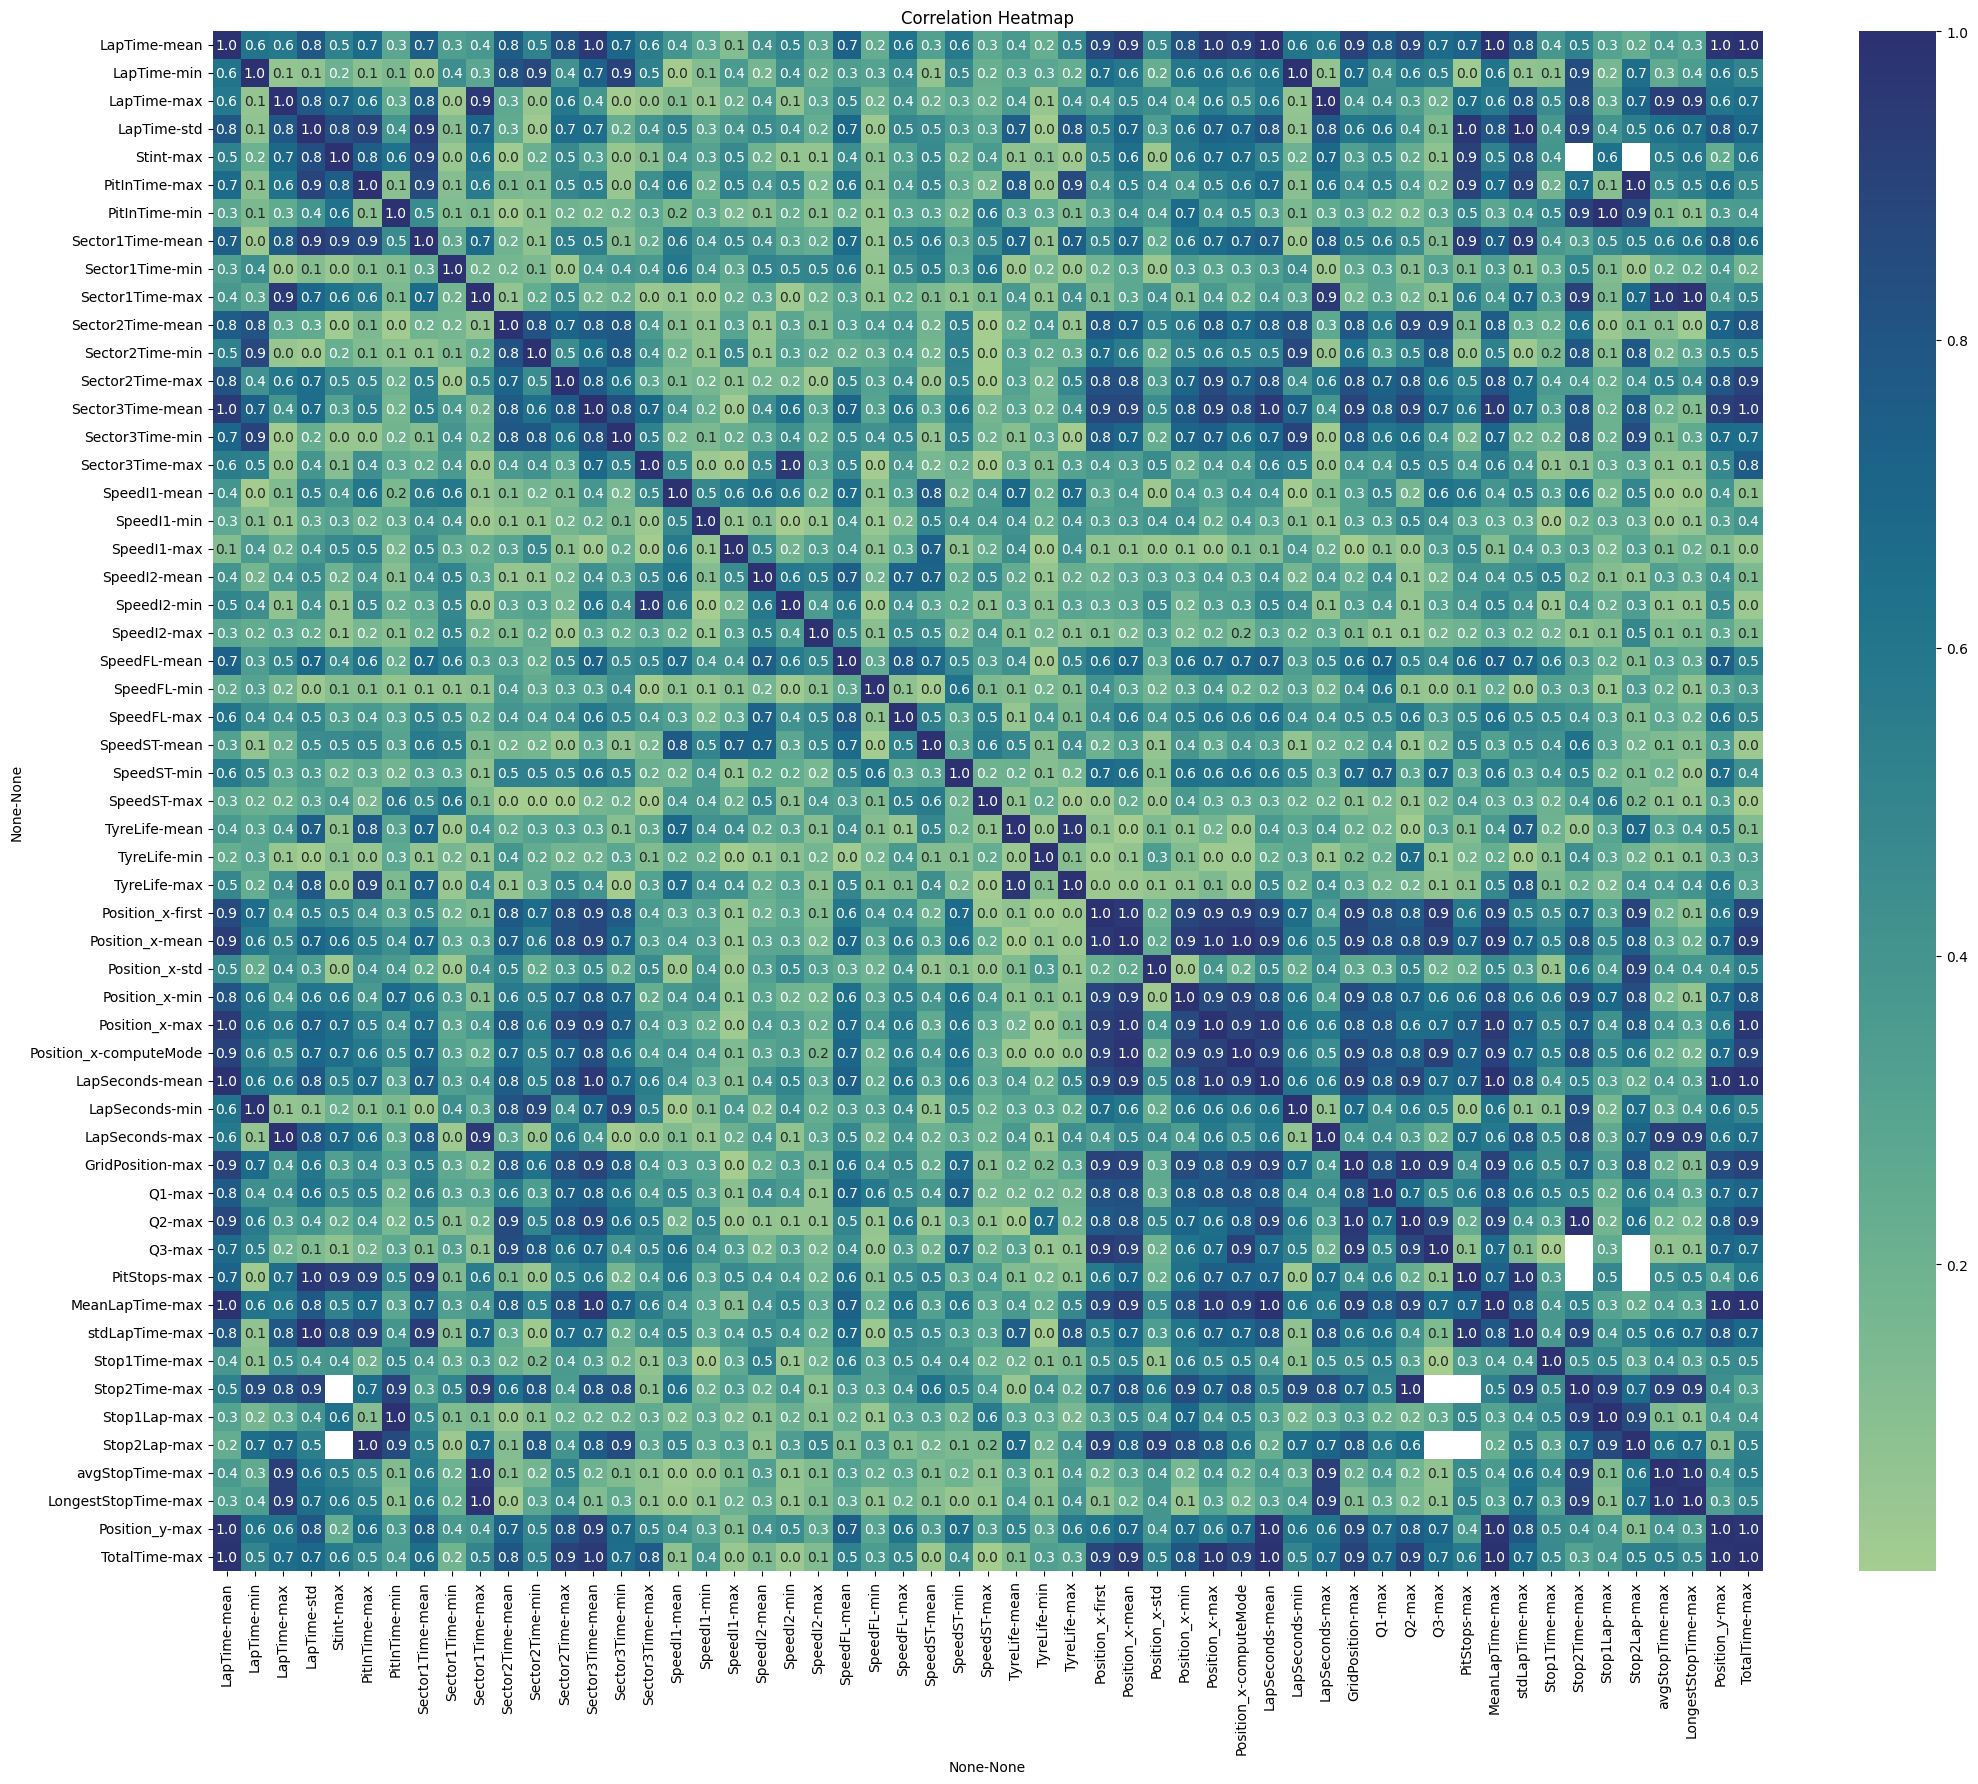

In [564]:
plt.figure(figsize=(25, 20))  # Adjust the figure size as needed
sns.heatmap(statsCorr, annot=True, cmap='crest', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

In [524]:
# driversSeconds = driversSeconds.dropna(subset=[('LapTime', 'mean')])
# driversSeconds = driversSeconds.dropna(subset=[('TotalTime', 'max')])
# display(driversSeconds)
# corr, p_value = pearsonr(driversSeconds['LapTime']['mean'], driversSeconds['TotalTime']['max'])
# display(corr)
# display(p_value)

<Axes: xlabel="('Position_x', 'max')", ylabel="('TotalTime', 'max')">

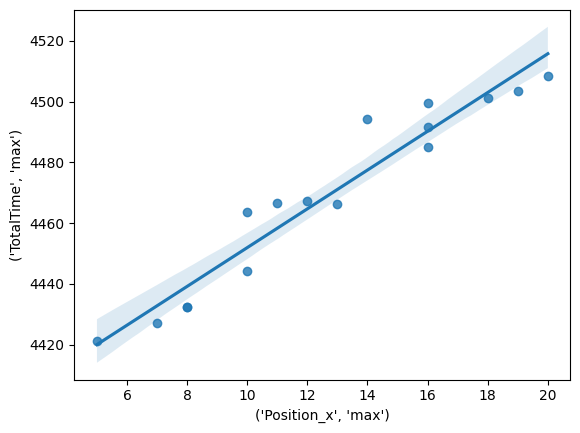

In [548]:
sns.regplot(x=driversSeconds[('Position_x', 'max')], y=driversSeconds[('TotalTime', 'max')])

0.9971991057902699

3.5993109169248776e-17

<Axes: xlabel="('LapTime', 'mean')", ylabel="('TotalTime', 'max')">

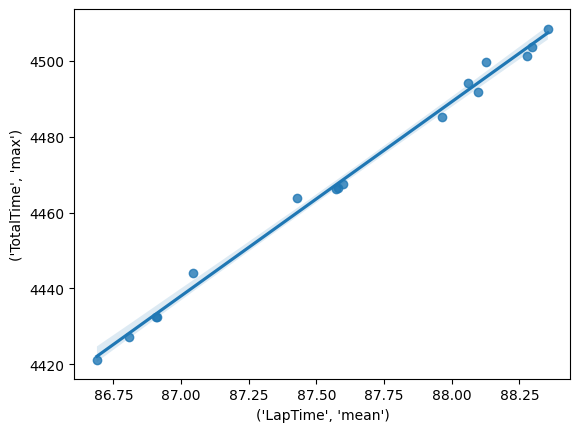

In [551]:
corr, p_value = pearsonr(driversSeconds[('LapTime', 'mean')], driversSeconds[('TotalTime', 'max')])
display(corr)
display(p_value)

sns.regplot(x=driversSeconds[('LapTime', 'mean')], y=driversSeconds[('TotalTime', 'max')])

<Axes: xlabel="('Sector3Time', 'mean')", ylabel="('TotalTime', 'max')">

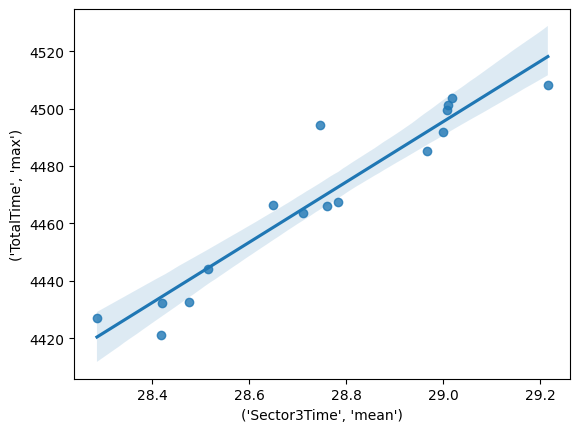

In [550]:
sns.regplot(x=driversSeconds[('Sector3Time', 'mean')], y=driversSeconds[('TotalTime', 'max')])

<Axes: xlabel="('GridPosition', 'max')", ylabel="('TotalTime', 'max')">

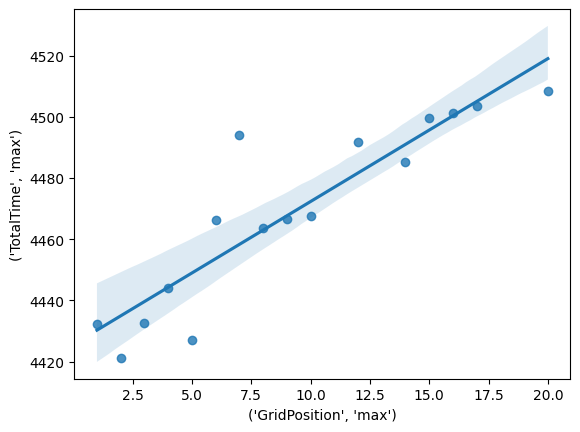

In [552]:
sns.regplot(x=driversSeconds[('GridPosition', 'max')], y=driversSeconds[('TotalTime', 'max')])

In [566]:
# feature_cols = ['y', 'x', 'Precipitation', 'Evapotranspiration', 'month', 'Irrigation_pumping', 'Date']
crossValidations = 20
avgRSquared = 0
for _ in range(crossValidations):
        X = driversSeconds.drop([('TotalTime', 'max'), ('Position_y', 'max')])
        y = driversSeconds[('TotalTime', 'max')]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

        lm = LinearRegression()
        lm.fit(X_train, y_train)
        
        avgRSquared += lm.score(X_test, y_test)
avgRSquared /= crossValidations
avgRSquared

KeyError: "[('TotalTime', 'max'), ('Position_y', 'max')] not found in axis"

## Circuits

In [ ]:
circuits = pd.read_csv('circuits.csv')
circuits[circuits.circuitId == 14]

## Races

In [ ]:
races = pd.read_csv('races.csv')
races

In [ ]:
sns.scatterplot(x='circuitId', y='year', data=races)

In [ ]:
raceTotals = races.groupby('circuitId').agg({'raceId': 'count', 'year': 'max'}).reset_index()
raceTotals = raceTotals[raceTotals.year == 2023].reset_index(drop=True).sort_values('raceId', ascending=False)
raceTotals

In [ ]:
recentRaces = races[races.circuitId.isin(raceTotals.circuitId)].reset_index(drop=True)
sns.scatterplot(x='circuitId', y='year', data=recentRaces)

In [ ]:
circuitsToKeep = recentRaces[recentRaces.year == 2009]
recentRaces = races[races.circuitId.isin(circuitsToKeep.circuitId)].reset_index(drop=True)
commonNames = recentRaces.groupby('circuitId')['name'].agg(lambda x: x.mode().iloc[0]).reset_index()
commonNames.columns = ['circuitId', 'common_name']
recentRaces = pd.merge(recentRaces, commonNames, on='circuitId', how='left')
display(recentRaces)
display(recentRaces.common_name.unique())
display(raceTotals[raceTotals.circuitId.isin(recentRaces.circuitId)])

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='common_name', y='year', data=recentRaces, hue='name', s=100)
plt.xticks(rotation=90)

In [ ]:
recentRaces = pd.merge(recentRaces, circuits, on='circuitId', how='left')
recentRaces = recentRaces.rename(columns={'name_x': 'race_name', 'url_x': 'race_url', 'common_name': 'common_race_name', 'name_y': 'circuit_name', 'url_y': 'circuit_url'})
recentRaces

## Constructor Results

In [ ]:
constructor_results = pd.read_csv('constructor_results.csv')
constructor_results = pd.merge(constructor_results, races[['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time']], how='left')
constructor_results

## Constructor Standings

In [ ]:
constructor_standings = pd.read_csv('constructor_standings.csv')
display(constructor_standings)
constructor_standings.groupby('raceId').agg({'constructorId': 'count', 'wins': 'sum'})
# constructor_standings[constructor_standings.constructorId == 1].wins.tolist()

In [ ]:
circuit_id = [1,3,4,6,9,11,13,14,15,18,22,24]

In [ ]:
australian_circuit = races.loc[races['circuitId'] == 1]
australian_circuit = australian_circuit[australian_circuit.year >= 2008]
australian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

lap_times = pd.read_csv('lap_times.csv')

merged_australian_circuit =  pd.merge(australian_circuit, lap_times, on='raceId')
display(merged_australian_circuit)


In [ ]:
bahrain_circuit = races.loc[races['circuitId'] == 3]
bahrain_circuit = bahrain_circuit[bahrain_circuit.year >= 2008]
bahrain_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)


merged_bahrain_circuit =  pd.merge(bahrain_circuit, lap_times, on='raceId')
display(merged_bahrain_circuit)

In [ ]:
spanish_circuit = races.loc[races['circuitId'] == 4]
spanish_circuit = spanish_circuit[spanish_circuit.year >= 2008]
spanish_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_spanish_circuit =  pd.merge(spanish_circuit, lap_times, on='raceId')
display(merged_spanish_circuit)

In [ ]:
monaco_circuit = races.loc[races['circuitId'] == 6]
monaco_circuit = monaco_circuit[monaco_circuit.year >= 2008]
monaco_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_monaco_circuit =  pd.merge(monaco_circuit, lap_times, on='raceId')
display(merged_monaco_circuit)


In [ ]:
british_circuit = races.loc[races['circuitId'] == 9]
british_circuit = british_circuit[british_circuit.year >= 2008]
british_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_british_circuit =  pd.merge(british_circuit, lap_times, on='raceId')
display(merged_british_circuit)

In [ ]:
hungarian_circuit = races.loc[races['circuitId'] == 11]
hungarian_circuit = hungarian_circuit[hungarian_circuit.year >= 2008]
hungarian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)


merged_hungarian_circuit =  pd.merge(hungarian_circuit, lap_times, on='raceId')
display(merged_hungarian_circuit)

In [ ]:
belgian_circuit = races.loc[races['circuitId'] == 13]
belgian_circuit = belgian_circuit[belgian_circuit.year >= 2008]
belgian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_belgian_circuit =  pd.merge(belgian_circuit, lap_times, on='raceId')
display(merged_belgian_circuit)

In [ ]:
italian_circuit = races.loc[races['circuitId'] == 14]
italian_circuit = italian_circuit[italian_circuit.year >= 2008]
italian_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_italian_circuit =  pd.merge(italian_circuit, lap_times, on='raceId')
display(merged_italian_circuit)

In [ ]:
singapore_circuit = races.loc[races['circuitId'] == 15]
singapore_circuit = singapore_circuit[singapore_circuit.year >= 2008]
singapore_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_singapore_circuit =  pd.merge(singapore_circuit, lap_times, on='raceId')
display(merged_singapore_circuit)

In [ ]:
sao_paulo_circuit = races.loc[races['circuitId'] == 18]
sao_paulo_circuit = sao_paulo_circuit[sao_paulo_circuit.year >= 2008]
sao_paulo_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_sao_paulo_circuit =  pd.merge(sao_paulo_circuit, lap_times, on='raceId')
display(merged_sao_paulo_circuit)

In [ ]:
japanese_circuit = races.loc[races['circuitId'] == 22]
japanese_circuit = japanese_circuit[japanese_circuit.year >= 2008]
japanese_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_japanese_circuit =  pd.merge(japanese_circuit, lap_times, on='raceId')
display(merged_japanese_circuit)

In [ ]:
abu_dhabi_circuit = races.loc[races['circuitId'] == 24]
abu_dhabi_circuit = abu_dhabi_circuit[abu_dhabi_circuit.year >= 2008]
abu_dhabi_circuit.drop(['url', 'fp1_date','fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1,  inplace=True)

merged_abu_dhabi_circuit =  pd.merge(abu_dhabi_circuit, lap_times, on='raceId')
display(merged_abu_dhabi_circuit)
